In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from reliabilipy import reliability_analysis
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
from factor_analyzer import ConfirmatoryFactorAnalyzer
from factor_analyzer import ModelSpecificationParser
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

import warnings
warnings.filterwarnings("ignore")

def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

# ANÁLISIS EASI

In [2]:
easi_exp = pd.read_excel('/mnt/72D08F32D08EFB9B/Users/Administrador/evechan/EASI-exp.xlsx')
easi_con = pd.read_excel('/mnt/72D08F32D08EFB9B/Users/Administrador/evechan/EASI-con.xlsx')
X_exp = StandardScaler().fit_transform(easi_exp)
X_con = StandardScaler().fit_transform(easi_con)

## ANÁLISIS FACTORIAL EXPLORATORIO

<Axes: xlabel='Factores', ylabel='EigenValues'>

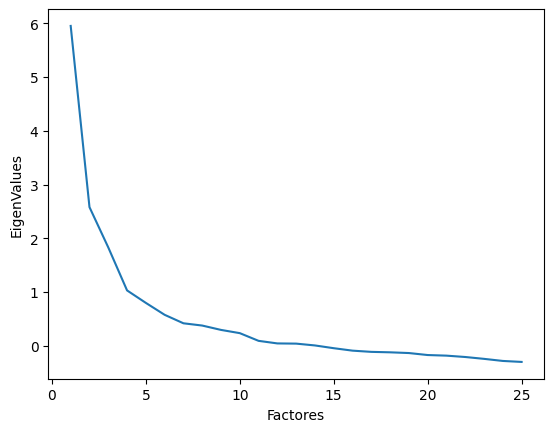

In [34]:
fa = FactorAnalyzer(n_factors = 10,
                    rotation = 'oblimin')
fa.fit(X_exp)

FactorAnalyzer(bounds = (0.005, 1),
               impute = 'median',
               is_corr_matrix = False,
               method = 'ml',
               n_factors = 3,
               rotation = 'oblimin',
               rotation_kwargs = {},
               use_smc = True)

factores = range(1, X_exp.shape[1] + 1)
evs = fa.get_eigenvalues()[1]
df = pd.DataFrame({'Factores':factores, 'EigenValues':evs})

sns.lineplot(data = df,
             x = 'Factores',
             y = 'EigenValues')

In [40]:
fa = FactorAnalyzer(n_factors = 5,
                    rotation = 'oblimin',
                    method = 'ml',
                    use_smc = True)
fa.fit(X_exp)

cols_exp = ['F1', 'F2', 'F3', 'F4', 'F5']
all_up = [False, False, False, False, False]

loadings = pd.DataFrame(fa.loadings_,
                        columns = cols_exp,
                        index = easi_exp.columns)\
                            .apply(lambda x: [y if y >= 0.3 else 0 for y in x])\
                            .sort_values(by = cols_exp,
                                        ascending = all_up)\
                            .apply(lambda x: [y if y > 0 else '' for y in x])

loadings

,F1,F2,F3,F4,F5
easi24,0.864643,,,,
easi14,0.767109,,,,
easi9,0.757517,,,,
easi4,0.630378,,,,
easi19,0.504218,,0.312425,,
easi1,,0.707474,,,
easi11,,0.665418,,,
easi6,,0.650936,,,
easi16,,0.577711,,,
easi21,,0.549184,,,


### Correlación entre factores

In [41]:
correlaciones = pd.DataFrame(fa.phi_,
                              columns = cols_exp,
                              index = cols_exp)
correlaciones

,F1,F2,F3,F4,F5
F1,1.000000,0.217698,0.179706,0.240831,0.404086
F2,0.217698,1.000000,0.189939,-0.050762,0.300507
F3,0.179706,0.189939,1.000000,0.296190,0.175003
F4,0.240831,-0.050762,0.296190,1.000000,0.251515
F5,0.404086,0.300507,0.175003,0.251515,1.000000


### Varianza explicada

In [46]:
var_array = fa.get_factor_variance()[1]
varianzas = pd.DataFrame(var_array,
                         columns = ['Varianza'],
                         index = cols_exp)
varianzas

,Varianza
F1,0.110485
F2,0.098456
F3,0.074912
F4,0.069866
F5,0.065810


## ANÁLISIS FACTORIAL CONFIRMATORIO
### BARTLETT

In [50]:
chi_square_value,p_value = calculate_bartlett_sphericity(X_con)
print('Ji cuadrada =', f'{chi_square_value:.3}')
print('p =', f'{p_value:.3}')

Ji cuadrada = 1.83e+03
p = 1.48e-217


### KMO

In [51]:
kmo_all,kmo_model=calculate_kmo(X_con)
print('KMO =', f'{kmo_model:.3}')

KMO = 0.855


In [52]:
factores = ['CS', 'RE', 'REM', 'SE', 'PF']
model_dict = {'CS':['easi1', 'easi6', 'easi11', 'easi16', 'easi21'],
              'RE':['easi2', 'easi7', 'easi12', 'easi17', 'easi22'],
              'REM':['easi3', 'easi8', 'easi13', 'easi18', 'easi23'],
              'SE':['easi4', 'easi9', 'easi14', 'easi19', 'easi24'],
              'PF':['easi5', 'easi10', 'easi15', 'easi20', 'easi25']}
model_spec = ModelSpecificationParser.parse_model_specification_from_dict(easi_con,
                                                                          model_dict)

cfa = ConfirmatoryFactorAnalyzer(model_spec,
                                 disp = False)
cfa.fit(easi_con.values)

loadings = pd.DataFrame(cfa.loadings_,
                        columns = factores,
                        index = sum(model_dict.values(), []))
loadings = loadings.replace(0, '', regex = True)
loadings

,CS,RE,REM,SE,PF
easi1,0.415377,,,,
easi6,0.49712,,,,
easi11,0.676151,,,,
easi16,0.546905,,,,
easi21,0.77454,,,,
easi2,,0.599767,,,
easi7,,0.685118,,,
easi12,,0.009571,,,
easi17,,0.612999,,,
easi22,,0.799804,,,


### CORRELACIONES ENTRE FACTORES

In [53]:
corr = cfa.factor_varcovs_
corr = pd.DataFrame(data = corr,
                    columns = factores,
                    index = factores)
corr

,CS,RE,REM,SE,PF
CS,1.000000,0.697010,0.487692,0.531608,0.644999
RE,0.697010,1.000000,0.651017,0.476661,0.500637
REM,0.487692,0.651017,1.000000,0.622208,0.517289
SE,0.531608,0.476661,0.622208,1.000000,0.450603
PF,0.644999,0.500637,0.517289,0.450603,1.000000


<Axes: >

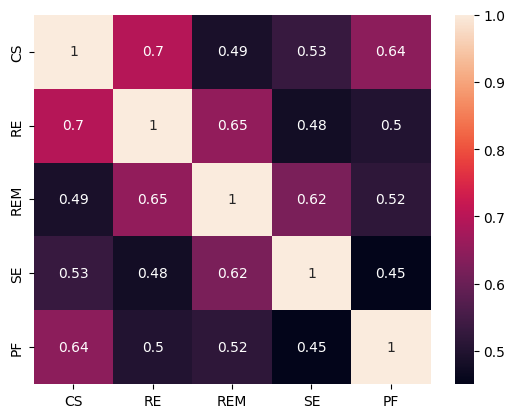

In [54]:
sns.heatmap(data = corr,
            annot = True)

### CONFIABILIDAD

In [55]:
ra = reliability_analysis(raw_dataset = easi_con,
                          is_corr_matrix = False,
                          impute = 'median')
ra.fit()

print('Omega total =', f'{ra.omega_total:.3}')
print('Alfa de Cronbach total =', f'{ra.alpha_cronbach:.3}')

Omega total = 0.895
Alfa de Cronbach total = 0.874


### Alfas de Cronbach

In [73]:
CS = easi_con[model_dict['CS']]
RE = easi_con[model_dict['RE']]
REM = easi_con[model_dict['REM']]
SE = easi_con[model_dict['SE']]
PF = easi_con[model_dict['PF']]


factores = [CS, RE, REM, SE, PF]

for factor in factores:
    ra = reliability_analysis(raw_dataset = factor,
                          is_corr_matrix = False,
                          impute = 'median')
    ra.fit() 
    print('Omega de', get_df_name(factor), '=', f'{ra.omega_total:.3}')
    print('Alfa de Cronbach de', get_df_name(factor), '=' , f'{ra.alpha_cronbach:.3}')

    for item in factor.columns:
        it_del = factor.drop(item, axis = 1)
        ra_id = reliability_analysis(raw_dataset = it_del,
                                     is_corr_matrix = False,
                                     impute = 'median')
        ra_id.fit()
        print('    Si se elimima el item', item, 'el alfa queda en', f'{ra_id.alpha_cronbach:.3}')
        if ra.alpha_cronbach >= ra_id.alpha_cronbach:
            print('          Se sugiere conservar el item')
        else:
            print('          Se sugiere eliminar el item')

Omega de CS = 0.832
Alfa de Cronbach de CS = 0.825
    Si se elimima el item easi1 el alfa queda en 0.804
          Se sugiere conservar el item
    Si se elimima el item easi6 el alfa queda en 0.784
          Se sugiere conservar el item
    Si se elimima el item easi11 el alfa queda en 0.786
          Se sugiere conservar el item
    Si se elimima el item easi16 el alfa queda en 0.795
          Se sugiere conservar el item
    Si se elimima el item easi21 el alfa queda en 0.785
          Se sugiere conservar el item
Omega de RE = 0.678
Alfa de Cronbach de RE = 0.66
    Si se elimima el item easi2 el alfa queda en 0.62
          Se sugiere conservar el item
    Si se elimima el item easi7 el alfa queda en 0.66
          Se sugiere eliminar el item
    Si se elimima el item easi12 el alfa queda en 0.581
          Se sugiere conservar el item
    Si se elimima el item easi17 el alfa queda en 0.599
          Se sugiere conservar el item
    Si se elimima el item easi22 el alfa queda en 0

# ANÁLISIS ESNOV

In [11]:
esnov_exp = pd.read_excel('/mnt/72D08F32D08EFB9B/Users/Administrador/evechan/ESNOV-exp.xlsx')
esnov_con = pd.read_excel('/mnt/72D08F32D08EFB9B/Users/Administrador/evechan/ESNOV-con.xlsx')
Z_exp = StandardScaler().fit_transform(esnov_exp)
Z_con = StandardScaler().fit_transform(esnov_con)

## ANÁLISIS FACTORIAL EXPLORATORIO

<Axes: xlabel='Factores', ylabel='EigenValues'>

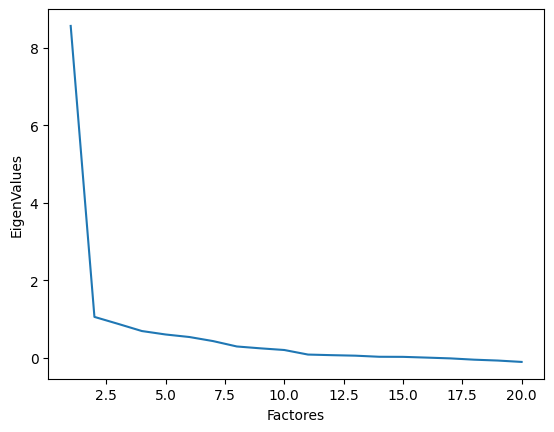

In [12]:
fa = FactorAnalyzer(10, rotation = None)
fa.fit(Z_exp)

FactorAnalyzer(bounds = (0.005, 1),
               impute = 'median',
               is_corr_matrix = False,
               method = 'minres',
               n_factors = 3,
               rotation = None,
               rotation_kwargs = {},
               use_smc = True)

factores = range(1, Z_exp.shape[1] + 1)
evs = fa.get_eigenvalues()[1]
df = pd.DataFrame({'Factores':factores, 'EigenValues':evs})

sns.lineplot(data = df,
             x = 'Factores',
             y = 'EigenValues')

## ANÁLISIS FACTORIAL CONFIRMATORIO

### BARTLETT

In [13]:
chi_square_value,p_value = calculate_bartlett_sphericity(Z_con)
print('Ji cuadrada =', f'{chi_square_value:.3}')
print('p =', f'{p_value:.3}')

Ji cuadrada = 1.88e+03
p = 5.26e-275


### KMO

In [14]:
kmo_all,kmo_model=calculate_kmo(Z_con)
print('KMO =', f'{kmo_model:.3}')

KMO = 0.943


In [15]:
factores = ['SENV', 'SSNV']
model_dict = {'SENV':['esnov1', 'esnov3', 'esnov5', 'esnov7', 'esnov9',
                      'esnov11', 'esnov13', 'esnov15', 'esnov17', 'esnov19'],
              'SSNV':['esnov2', 'esnov4', 'esnov6', 'esnov8', 'esnov10',
                      'esnov12', 'esnov14', 'esnov16', 'esnov18', 'esnov20']}
model_spec = ModelSpecificationParser.parse_model_specification_from_dict(esnov_con,
                                                                          model_dict)

cfa = ConfirmatoryFactorAnalyzer(model_spec,
                                 disp = False)
cfa.fit(esnov_con.values)

loadings = pd.DataFrame(cfa.loadings_,
                        columns = factores,
                        index = sum(model_dict.values(), []))
loadings = loadings.replace(0, '', regex = True)
loadings

,SENV,SSNV
esnov1,0.928402,
esnov3,0.901012,
esnov5,0.923511,
esnov7,0.8911,
esnov9,1.05123,
esnov11,0.946145,
esnov13,0.926037,
esnov15,0.907214,
esnov17,0.929069,
esnov19,0.985403,


In [16]:
corr = cfa.factor_varcovs_
corr = pd.DataFrame(data = corr, columns = factores, index = factores)
corr

,SENV,SSNV
SENV,1.000000,0.353002
SSNV,0.353002,1.000000


### CONFIABILIDAD

In [17]:
ra = reliability_analysis(raw_dataset = esnov_con,
                          is_corr_matrix = False,
                          impute = 'median')
ra.fit()

print('Omega total =', f'{ra.omega_total:.3}')
print('Alfa de Cronbach total =', f'{ra.alpha_cronbach:.3}')

Omega total = 0.924
Alfa de Cronbach total = 0.93


In [18]:
SENV = esnov_con[model_dict['SENV']]
SSNV = esnov_con[model_dict['SSNV']]


factores = [SENV, SSNV]

for factor in factores:
    ra = reliability_analysis(raw_dataset = factor,
                          is_corr_matrix = False,
                          impute = 'median')
    ra.fit()
    print('Omega de', get_df_name(factor), '=', f'{ra.omega_total:.3}')
    print('Alfa de Cronbach de', get_df_name(factor), '=' , f'{ra.alpha_cronbach:.3}')

Omega de factor = 0.889
Alfa de Cronbach de factor = 0.883
Omega de factor = 0.872
Alfa de Cronbach de factor = 0.869
